## Now that we have data, let's make it look "pretty" #RIPBurtReynolds

In [1]:
from bs4 import BeautifulSoup

import nltk
import pandas as pd
import requests
from time import time

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np


from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

from sklearn import metrics

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
lakers = pd.read_csv('lakers scrape 2018-09-07 15:00:39.csv')
cavs = pd.read_csv('cavs scrape 2018-09-07 15:00:39.csv')
nba = pd.read_csv('nba scrape 2018-09-07 15:00:39.csv')

In [3]:
lakers.head()

,index,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,...,thumbnail_height,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,0,NaN,NaN,False,AutoModerator,NaN,NaN,NaN,[],NaN,...,NaN,NaN,Weekly Lakers Ticket Sales (September 01 - Sep...,16,https://www.reddit.com/r/lakers/comments/9c485...,[],NaN,False,all_ads,6
1,1,NaN,NaN,False,AutoModerator,NaN,NaN,NaN,[],NaN,...,NaN,NaN,Daily Off Season Lakers Discussion Thread - Se...,5,https://www.reddit.com/r/lakers/comments/9dupc...,[],NaN,False,all_ads,6
2,2,NaN,NaN,False,Luvsicpt2,NaN,NaN,black,[],b2acfc2e-6a1a-11e5-8246-0e49db09c135,...,140.0,140.0,Playing 2k19 when...,116,https://i.imgur.com/VCe3veY.jpg,[],NaN,False,all_ads,6
3,3,NaN,NaN,False,sevens777,NaN,NaN,NaN,[],NaN,...,140.0,140.0,The King loves staring at his enemies. Even in...,332,https://i.redd.it/s0z8yp6k2sk11.jpg,[],NaN,False,all_ads,6
4,4,NaN,NaN,False,sevens777,NaN,NaN,NaN,[],NaN,...,140.0,140.0,LeBron out there being the King of NY,138,https://i.redd.it/llb3v0512sk11.jpg,[],NaN,False,all_ads,6


In [4]:
cavs.head()

,index,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,...,thumbnail_height,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,0,NaN,NaN,False,AutoModerator,NaN,NaN,NaN,[],NaN,...,NaN,NaN,Weekly General Discussion Thread -- September ...,8,https://www.reddit.com/r/clevelandcavs/comment...,[],NaN,False,all_ads,6
1,1,NaN,NaN,False,AutoModerator,NaN,NaN,NaN,[],NaN,...,NaN,NaN,"Free Talk Friday -- September 07, 2018",5,https://www.reddit.com/r/clevelandcavs/comment...,[],NaN,False,all_ads,6
2,2,NaN,NaN,False,Parabolaz,NaN,NaN,NaN,[],NaN,...,140.0,140.0,"Just the goat, and some laker.",363,https://i.redd.it/ixkn9v1f1rk11.jpg,[],NaN,False,all_ads,6
3,3,NaN,NaN,False,dreamteamreddit,NaN,NaN,NaN,[],NaN,...,140.0,140.0,Kyrie Irving surprises a Cavaliers fan,33,https://i.imgur.com/WhiBySr.gifv,[],NaN,False,all_ads,6
4,4,NaN,NaN,False,Alex_Swervitz,NaN,NaN,CHAMPS,[],NaN,...,140.0,140.0,New banner downtown.,13,https://i.redd.it/fnd9tj5wjtk11.jpg,[],NaN,False,all_ads,6


In [5]:
nba.head()

,index,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,...,suggested_sort,thumbnail,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,0,NaN,NaN,False,AutoModerator,NaN,NaN,NaN,[],NaN,...,new,NaN,Daily Locker Room and Free Talk + Game Threads...,11,https://www.reddit.com/r/nba/comments/9du8wv/d...,[],NaN,False,all_ads,6
1,1,NaN,NaN,False,nick168,NaN,NaN,Bulls2,[],bf195fe4-3feb-11e8-8ef1-0e63bfcf8986,...,NaN,NaN,r/nba Best of August,1119,https://imgur.com/a/f6VeCtm,[],NaN,False,all_ads,6
2,2,NaN,NaN,False,dreamteamreddit,NaN,NaN,NaN,[],NaN,...,NaN,NaN,Celtics' Kyrie Irving surprises a Cavaliers fan,2712,https://i.imgur.com/WhiBySr.gifv,[],NaN,False,all_ads,6
3,3,NaN,NaN,False,deepwebteddy,NaN,NaN,Clippers4,[],NaN,...,NaN,NaN,A photo album of drunk NBA players,4300,https://imgur.com/gallery/au02EYC,[],NaN,False,all_ads,6
4,4,NaN,NaN,False,xashburner24,NaN,NaN,NaN,[],NaN,...,NaN,NaN,[Trae Young] I donated $13 to the @stevenashfd...,357,https://mobile.twitter.com/TheTraeYoung/status...,[],NaN,False,all_ads,6


In [6]:
features = ['author', 'num_comments', 'score', 'title']

lakers = lakers[features]
lakers['subreddit'] = 1

cavs = cavs[features]
cavs['subreddit'] = 2

nba = nba[features]
nba['subreddit'] = 0

In [7]:
frames = [nba, lakers, cavs]

posts = pd.concat(frames)

posts.head(3)

,author,num_comments,score,title,subreddit
0,AutoModerator,47,11,Daily Locker Room and Free Talk + Game Threads...,0
1,nick168,123,1119,r/nba Best of August,0
2,dreamteamreddit,192,2712,Celtics' Kyrie Irving surprises a Cavaliers fan,0


In [8]:
X = posts['title']
y = posts['subreddit']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [10]:
y_train.value_counts(normalize=True)

1    0.349542
0    0.326659
2    0.323799
Name: subreddit, dtype: float64

In [11]:
pipe = Pipeline([
    ('cv', CountVectorizer()), #stop_words=None
    ('mnb', MultinomialNB())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9416475972540046, 0.8044596912521441)

## Are You The Same Animal, But A Different Beast

In [12]:
cv = CountVectorizer(stop_words='english')

cv.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
X_train_cv = cv.transform(X_train)

In [14]:
X_test_cv = cv.transform(X_test)

In [15]:
eda = pd.DataFrame(X_train_cv.todense(), columns=cv.get_feature_names())

In [16]:
eda['subreddit'] = y_train.values

In [17]:
eda.head()

,000,01,02,03,04,05,06,07,08,09,...,zelman,zero,zgoda,zhuri,zizic,zu,zubac,zydrunas,šarić,ᴴᴰ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
eda.sum().sort_values(ascending=False)[:15]

subreddit    1743
lebron        237
lakers        184
nba           183
game          114
season        110
2018           97
kobe           96
cavs           93
team           85
james          76
cavaliers      72
league         69
cleveland      66
time           64
dtype: int64

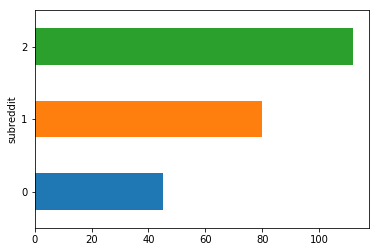

In [19]:
eda.groupby('subreddit').sum()['lebron'].plot(kind='barh');

In [20]:
eda.groupby('subreddit').sum()['lebron']

subreddit
0     45
1     80
2    112
Name: lebron, dtype: int64

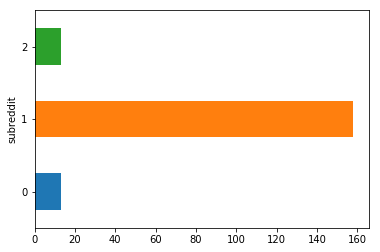

In [21]:
eda.groupby('subreddit').sum()['lakers'].plot(kind='barh');

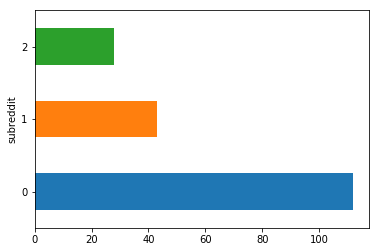

In [22]:
eda.groupby('subreddit').sum()['nba'].plot(kind='barh')

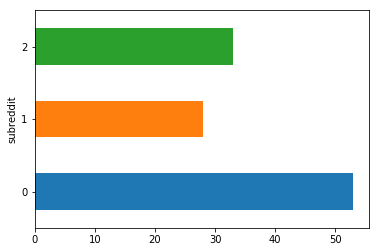

In [23]:
eda.groupby('subreddit').sum()['game'].plot(kind='barh')

In [24]:
eda.groupby('subreddit').sum()['game']

subreddit
0    53
1    28
2    33
Name: game, dtype: int64

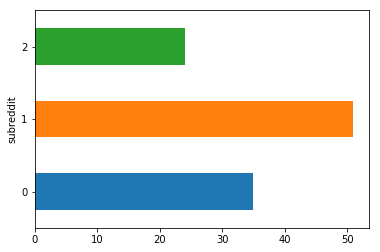

In [25]:
eda.groupby('subreddit').sum()['season'].plot(kind='barh')

In [26]:
eda.groupby('subreddit').sum()['season']

subreddit
0    35
1    51
2    24
Name: season, dtype: int64

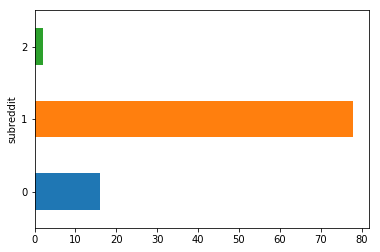

In [27]:
eda.groupby('subreddit').sum()['kobe'].plot(kind='barh')

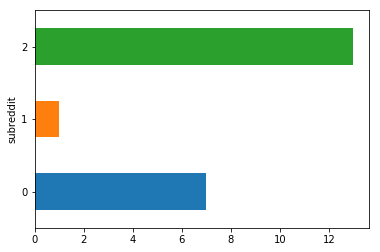

In [28]:
eda.groupby('subreddit').sum()['kyrie'].plot(kind='barh')

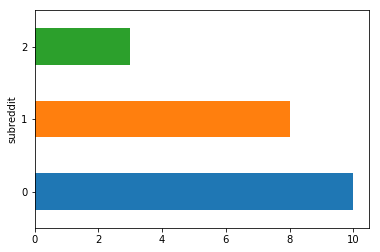

In [29]:
eda.groupby('subreddit').sum()['magic'].plot(kind='barh')

In [30]:
eda.groupby('subreddit').sum()['magic']

subreddit
0    10
1     8
2     3
Name: magic, dtype: int64

In [31]:
lcv = LogisticRegressionCV()
mnb = MultinomialNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

list_of_classifiers = [lcv, mnb, knc, dtc, etc, rfc, abc, gbc]

In [32]:
for each in list_of_classifiers:
    print(str(each).split('(')[0])
    each.fit(X_train_cv, y_train)
    print('Training score:')
    print(each.score(X_train_cv, y_train))
    print('Testing score:')
    print(each.score(X_test_cv, y_test))
    print()

LogisticRegressionCV
Training score:
0.9902745995423341
Testing score:
0.7821612349914236

MultinomialNB
Training score:
0.9382151029748284
Testing score:
0.8044596912521441

KNeighborsClassifier
Training score:
0.8672768878718535
Testing score:
0.6174957118353345

DecisionTreeClassifier
Training score:
0.9977116704805492
Testing score:
0.6689536878216124

ExtraTreesClassifier
Training score:
0.9977116704805492
Testing score:
0.7409948542024014

RandomForestClassifier
Training score:
0.988558352402746
Testing score:
0.7049742710120068

AdaBoostClassifier
Training score:
0.7294050343249427
Testing score:
0.7169811320754716

GradientBoostingClassifier
Training score:
0.8237986270022883
Testing score:
0.7495711835334476



## Lord VADER Rules Over ALL!!!!

In [33]:
corpus = list(posts['title'])

corpus[0]

'Daily Locker Room and Free Talk + Game Threads Index (2018.09.07)'

In [34]:
sia = SentimentIntensityAnalyzer()

sia.polarity_scores(corpus[0])

{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.5106}

In [35]:
dicts = []

for post in corpus:
    scores = sia.polarity_scores(post)
    scores['title'] = post
    dicts.append(scores)
    
vader = pd.DataFrame(dicts)
vader.head()

,compound,neg,neu,pos,title
0,0.5106,0.000,0.732,0.268,Daily Locker Room and Free Talk + Game Threads...
1,0.6369,0.000,0.417,0.583,r/nba Best of August
2,0.4939,0.000,0.488,0.512,Celtics' Kyrie Irving surprises a Cavaliers fan
3,-0.3400,0.324,0.676,0.000,A photo album of drunk NBA players
4,0.4215,0.000,0.863,0.137,[Trae Young] I donated $13 to the @stevenashfd...


In [36]:
vader['subreddit'] = posts['subreddit'].values

In [37]:
vader.groupby('subreddit').mean()

,compound,neg,neu,pos
subreddit,,,,
0,0.125099,0.048098,0.849807,0.102096
1,0.157276,0.031415,0.851179,0.114958
2,0.155412,0.032899,0.850472,0.115300


In [38]:
vader.sort_values(by='pos', ascending=False).head(5)

,compound,neg,neu,pos,title,subreddit
943,0.6124,0.0,0.167,0.833,Throwbacks? Yes Please,1
1238,0.6249,0.0,0.196,0.804,Great throwback,1
1886,0.5080,0.0,0.233,0.767,YES BABY!!,2
1038,0.7650,0.0,0.233,0.767,Best Value in NBA?,1
930,0.4404,0.0,0.256,0.744,Championship Contenders?,1


In [39]:
vader.sort_values(by='neg', ascending=False).head(5)

,compound,neg,neu,pos,title,subreddit
1347,-0.6523,0.684,0.316,0.0,Lance is NASTY,1
1253,-0.6219,0.671,0.329,0.0,LeBron vs. Haters!!!,1
256,-0.7096,0.663,0.337,0.0,Is the rings argument stupid ?,0
1549,-0.2263,0.655,0.345,0.0,Forgotten Laksers,1
838,-0.4404,0.592,0.408,0.0,Lakers.com frustrates me,1


In [40]:
vader.sort_values(by='neu', ascending=False).head(5)

,compound,neg,neu,pos,title,subreddit
1685,0.0,0.0,1.0,0.0,Collin Sexton makes incredible shot from building,2
1044,0.0,0.0,1.0,0.0,"Kobe crosses Matt Barnes then hits the jumper,...",1
2010,0.0,0.0,1.0,0.0,Over or Under 3 National TV games this season?,2
919,0.0,0.0,1.0,0.0,Daily Off Season Lakers Discussion Thread - Se...,1
918,0.0,0.0,1.0,0.0,Former Cavs sideline reporter Allie Clifton wi...,1


## Multinomial Naive Bayes looks like the best option.  What can we do to make the fit better

In [41]:
pipe = Pipeline([
      ('cv', CountVectorizer(stop_words='english', ngram_range=(1,2))),
      ('mnb', MultinomialNB())
    ])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9834096109839817, 0.8147512864493996)

In [42]:
pipe = Pipeline([
      ('cv', CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2)),
      ('mnb', MultinomialNB())
    ])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9090389016018307, 0.8198970840480274)

In [43]:
pipe = Pipeline([
      ('cv', CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2)),
      ('mnb', MultinomialNB(alpha=2))
    ])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.898741418764302, 0.8198970840480274)

In [44]:
predicted = pipe.predict(X_test)
 
def printreport(exp, pred):
    print(pd.crosstab(exp, pred, rownames=['Actual'], colnames=['Predicted']))
 
    print('\n \n')
    print(classification_report(exp, pred))
 
printreport(y_test, predicted)

Predicted    0    1    2
Actual                  
0          147   33   11
1           18  173   13
2           12   18  158

 

             precision    recall  f1-score   support

          0       0.83      0.77      0.80       191
          1       0.77      0.85      0.81       204
          2       0.87      0.84      0.85       188

avg / total       0.82      0.82      0.82       583



In [45]:
metrics.accuracy_score(y_test, predicted)

0.8198970840480274